# inforet 1

## getting the data

Today, we will work with the UN General Debate dataset. The corpus consists of 7,507 speeches held at the annual sessions of the United Nations General Assembly from 1970 to 2016. It was created in 2017 by Mikhaylov, Baturo, and Dasandi at Harvard “for understanding and measuring state preferences in world politics.” Each of the almost 200 countries in the United Nations has the opportunity to present its views on global topics such international conflicts, terrorism, or climate change at the annual General Debate.
Work on this data is proposed in the book 

- https://github.com/blueprints-for-text-analytics-python/blueprints-text
- from here, but it's easier to use the version on my server. 
  - https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/data/un-general-debates/un-general-debates-blueprint.csv.gz



## downloading some toy data

In [1]:
# check if the file un-general-debates-blueprint.csv is present
# if not, download it from the web and unzip it
import os

file_name = 'un-general-debates-blueprint.csv'
gz_file = file_name + '.gz'
url = 'https://gerdes.fr/saclay/inforet/' + gz_file

if os.path.exists(file_name):
    print('File already present')
else:
    print('Downloading the file...')
    os.system(f'curl -o {gz_file} {url}')
    os.system(f'gunzip {gz_file}')

File already present


	
if you have a problem with the above code, 
you can also simply get the zip, unzip and put it manuaylly next to your notbook:

https://gerdes.fr/saclay/informationRetrieval/un-general-debates-blueprint.csv.gz

or try using wget:
```
!wget https://gerdes.fr/saclay/informationRetrieval/un-general-debates-blueprint.csv.gz
import gzip, shutil
with open('un-general-debates-blueprint.csv.gz', 'rb') as f_in:
    with gzip.open('un-general-debates-blueprint.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
```
      

In [2]:
# this turns on the autotimer, so that every cell has a timing information below
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
# to stop using autotime, run the following command
# %unload_ext autotime

time: 187 μs (started: 2025-03-13 09:08:36 +01:00)


In [3]:
!pip install wordcloud seaborn

time: 1.58 s (started: 2025-03-13 09:08:36 +01:00)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm
from wordcloud import WordCloud
import re

time: 2.13 s (started: 2025-03-13 09:08:40 +01:00)


In [5]:
df = pd.read_csv("un-general-debates-blueprint.csv")
df.sample(22) #, random_state=53)

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text
6065,63.0,2008.0,LSO,Lesotho,Mohlabi Teskoa,Minister for Foreign Affairs,My delegation associates \nitself with the com...
251,27.0,1972.0,LAO,Lao People's Democratic Republic,Mr. Na Champassak,NaN,"His Highness Prince Souvanna Phouma, our First..."
3733,50.0,1995.0,VCT,Saint Vincent and the Grenadines,Mr. Allen,Minister for Foreign Affairs,"I wish,\non behalf of my country, Saint Vincen..."
5494,60.0,2005.0,LTU,Lithuania,Oskaras Jusys,Minister for Foregn Affairs,Lithuania welcomes this\neffort — the most ext...
3331,48.0,1993.0,MWI,Malawi,Mr. MBEKEANI,NaN,The Malawi delegation is\npleased to join othe...
4083,52.0,1997.0,TZA,"Tanzania, United Republic of",Jakaya Mrisho Kikwete,Minister for Foreign Affairs,"﻿Please\npermit me, Sir, at the outset, to off..."
2239,41.0,1986.0,SDN,Sudan,Mr. AL-MAHDI,Prime Minister,"I extend to you. Sir, my sincere congratulatio..."
7015,68.0,2013.0,KGZ,Kyrgyzstan,Erlan Abdyldayev,Minister for Foreign Affairs,Thirteen years have passed since the adoption ...
6510,65.0,2010.0,SYC,Seychelles,Jean-Paul Adam,Minister for Foreign Affairs,May I take this \nopportunity to join those wh...
1973,39.0,1984.0,UGA,Uganda,Owiny,NaN,﻿It is a source of pride and pleasure for my d...


time: 1.87 s (started: 2025-03-13 09:08:43 +01:00)


## Let's get to know the data (and Pandas):

In [6]:
df.columns, df.dtypes

(Index(['un-general-debates-blueprint.csv', 'year', 'country', 'country_name',
        'speaker', 'position', 'text'],
       dtype='object'),
 un-general-debates-blueprint.csv    float64
 year                                float64
 country                              object
 country_name                         object
 speaker                              object
 position                             object
 text                                 object
 dtype: object)

time: 6.49 ms (started: 2025-03-13 09:08:46 +01:00)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
un-general-debates-blueprint.csv,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0


time: 36.2 ms (started: 2025-03-13 09:08:47 +01:00)


#### 🚧 todo: 
- explain 
	- why only two rows?
	- the strange row above and the values you find. Look into the data!

answers: 

1. Only two columns are numeric.
2. The “strange row” labeled blueprint.csv is just Pandas’ way of showing stats for that first numeric column.

In [8]:
df.info(memory_usage='deep')
# check the total memory usage compared to the original file size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7508 entries, 0 to 7507
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   un-general-debates-blueprint.csv  7507 non-null   float64
 1   year                              7507 non-null   float64
 2   country                           7507 non-null   object 
 3   country_name                      7507 non-null   object 
 4   speaker                           7480 non-null   object 
 5   position                          4502 non-null   object 
 6   text                              7507 non-null   object 
dtypes: float64(2), object(5)
memory usage: 231.8 MB
time: 50.1 ms (started: 2025-03-13 09:08:48 +01:00)


## Adding length columns, describing the dataframe

In [9]:
df['nb_chars'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
un-general-debates-blueprint.csv,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
nb_chars,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


time: 49.4 ms (started: 2025-03-13 09:08:49 +01:00)


#### 🚧 todo: estimate the number of words

- what's the average word size in English? (Remember HoNLP, that class before the vacation?)
- what's the mean, min, and max of estimated wordsize?
- suppose that a page 11pt has on average 600 words, what are the values in number of pages?
- suppose that on average, an English speaker pronounces 150 words per minute, what are the values for the duration of the speeches?


In [10]:
avg_word_length = 5  # characters per word, rough rule of thumb
words_per_page = 600
words_per_minute = 150

df['estimated_words'] = df['nb_chars'] / avg_word_length
df['estimated_pages'] = df['estimated_words'] / words_per_page
df['estimated_minutes'] = df['estimated_words'] / words_per_minute

longest_words   = df['estimated_words'].max()
shortest_words  = df['estimated_words'].min()
mean_words      = df['estimated_words'].mean()

longest_pages   = df['estimated_pages'].max()
shortest_pages  = df['estimated_pages'].min()
mean_pages      = df['estimated_pages'].mean()

longest_minutes = df['estimated_minutes'].max()
shortest_minutes= df['estimated_minutes'].min()
mean_minutes    = df['estimated_minutes'].mean()

print(f"Speech length in words: shortest={shortest_words:.0f}, avg={mean_words:.0f}, longest={longest_words:.0f}")
print(f"Speech length in pages: shortest={shortest_pages:.1f}, avg={mean_pages:.1f}, longest={longest_pages:.1f}")
print(f"Speech duration (minutes): shortest={shortest_minutes:.1f}, avg={mean_minutes:.1f}, longest={longest_minutes:.1f}")

Speech length in words: shortest=472, avg=3593, longest=14408
Speech length in pages: shortest=0.8, avg=6.0, longest=24.0
Speech duration (minutes): shortest=3.1, avg=24.0, longest=96.1
time: 7.93 ms (started: 2025-03-13 09:08:50 +01:00)





#### 🚧 todo: add a wordlength column

In [11]:
# # 🚧 todo: explain why this fails
# df['nb_words'] = df['text'].str.split().len()

# .len() does not exist as a method on Series

# # 🚧 todo: explain why this fails
# df['nb_words'] = df['text'].str.split().apply(len)

# apply(len) on a series of lists will fail if there are NaN instead of strings

# 🚧 todo: find a way of getting this column

df["nb_words"] = df["text"].fillna("").astype(str).str.split().apply(len)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
un-general-debates-blueprint.csv,7507.0,49.610763,12.892155,25.000000,39.000000,51.000000,61.000000,70.000000
year,7507.0,1994.610763,12.892155,1970.000000,1984.000000,1996.000000,2006.000000,2015.000000
nb_chars,7507.0,17967.281604,7860.038463,2362.000000,12077.000000,16424.000000,22479.500000,72041.000000
estimated_words,7507.0,3593.456321,1572.007693,472.400000,2415.400000,3284.800000,4495.900000,14408.200000
estimated_pages,7507.0,5.989094,2.620013,0.787333,4.025667,5.474667,7.493167,24.013667
estimated_minutes,7507.0,23.956375,10.480051,3.149333,16.102667,21.898667,29.972667,96.054667
nb_words,7508.0,2865.088173,1278.844035,0.000000,1905.000000,2611.000000,3597.250000,11476.000000


time: 2.43 s (started: 2025-03-13 09:08:59 +01:00)


In [12]:
16424.0/2611.0

6.290310225967063

time: 4.05 ms (started: 2025-03-13 09:09:02 +01:00)


#### 🚧 todo: check the results

- how was our estimate of word length compared to reality?
- if your minumum wordlength is now 0 or 1, explain by checking the file.
- the simple tokenization by splitting gives in average longer or shorter words than a more linguistically motivated tokenization?

In [13]:
# answer: 

# We overestimated word counts by assuming 5 chars/word. The actual text (based on naive splitting) is closer to 6.3 chars/word on average.
# The minimum word count is 0 (or 1) likely because some rows are empty, contain placeholder text, or had missing data.
# Naive whitespace splitting yields fewer tokens (longer average word length) than a more linguistically sophisticated tokenizer, because it doesn’t strip punctuation or separate contractions.

time: 515 μs (started: 2025-03-13 09:09:03 +01:00)


In [14]:
df[['country', 'country_name', 'speaker', 'position']].describe().T

,count,unique,top,freq
country,7507,199,ALB,46
country_name,7507,199,Albania,46
speaker,7480,5428,Seyoum Mesfin,12
position,4502,113,Minister for Foreign Affairs,1813


time: 33.1 ms (started: 2025-03-13 09:09:04 +01:00)


#### 🚧 TODO: 
- why does the describe() function works differently now?

When you select non-numeric columns (like country, country_name, speaker, position) and call df.describe(), Pandas automatically switches to its "object (string) summary" mode.

## NaN ≠ NA
NaN means 0/0. NaN stands for Not a Number

NA is generally interpreted as a missing value and has various forms - NA_integer_, NA_real_, etc.

https://stats.stackexchange.com/questions/5686/what-is-the-difference-between-nan-and-na

In [15]:
df.isna().sum()

un-general-debates-blueprint.csv       1
year                                   1
country                                1
country_name                           1
speaker                               28
position                            3006
text                                   1
nb_chars                               1
estimated_words                        1
estimated_pages                        1
estimated_minutes                      1
nb_words                               0
dtype: int64

time: 14.1 ms (started: 2025-03-13 09:09:06 +01:00)


In [16]:
df[df['position'].isna()]

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text,nb_chars,estimated_words,estimated_pages,estimated_minutes,nb_words
0,25.0,1970.0,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419.0,10283.8,17.139667,68.558667,8306
1,25.0,1970.0,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286.0,5857.2,9.762000,39.048000,4780
2,25.0,1970.0,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839.0,6367.8,10.613000,42.452000,5204
3,25.0,1970.0,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616.0,5323.2,8.872000,35.488000,4325
4,25.0,1970.0,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911.0,5182.2,8.637000,34.548000,4290
...,...,...,...,...,...,...,...,...,...,...,...,...
6594,66.0,2011.0,EU,European Union,NaN,NaN,Europe presents to you a message of \ncooperat...,11804.0,2360.8,3.934667,15.738667,1939
6982,68.0,2013.0,EU,European Union,NaN,NaN,A year ago \nwhen we met in the General Assemb...,11477.0,2295.4,3.825667,15.302667,1904
7175,69.0,2014.0,EU,European Union,NaN,NaN,The world today is much more dangerous than \n...,10617.0,2123.4,3.539000,14.156000,1744
7420,70.0,2015.0,MAR,Morocco,Prince Moulay Rachid,NaN,King Mohammed VI has mandated me\nto convey hi...,9654.0,1930.8,3.218000,12.872000,1461


time: 25.6 ms (started: 2025-03-13 09:09:07 +01:00)


In [17]:
df.fillna({'speaker': 'unknown', 'position': 'unknown'}, inplace=True)
df[df['position'].isna()]

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text,nb_chars,estimated_words,estimated_pages,estimated_minutes,nb_words


time: 16.1 ms (started: 2025-03-13 09:09:07 +01:00)


# categorical values vs numerical values

In [18]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64

time: 8.42 ms (started: 2025-03-13 09:09:08 +01:00)


<Axes: >

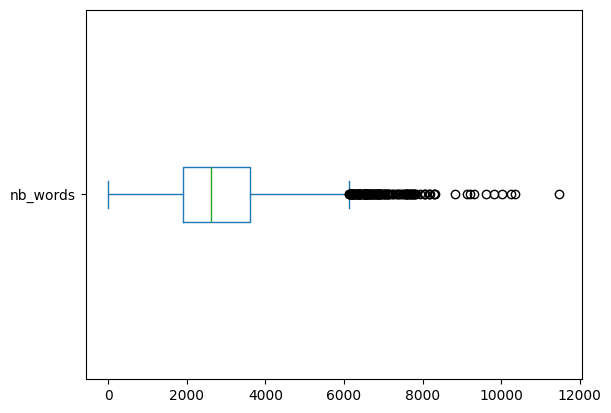

time: 142 ms (started: 2025-03-13 09:09:09 +01:00)


In [19]:
df['nb_words'].plot(kind='box', vert=False)


<Axes: ylabel='Frequency'>

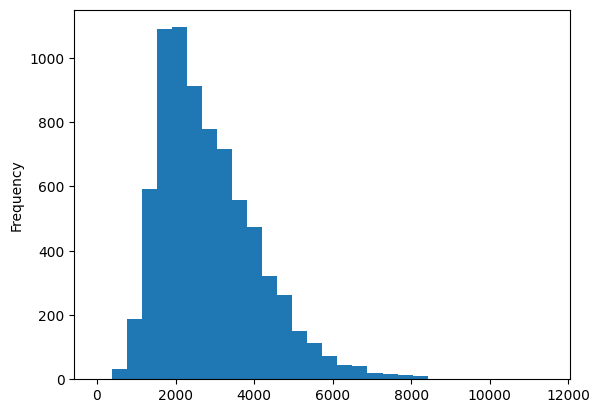

time: 175 ms (started: 2025-03-13 09:09:10 +01:00)


In [20]:
df['nb_words'].plot(kind='hist', bins=30) # , figsize=(8,2)

### Kernel density estimation

https://en.wikipedia.org/wiki/Kernel_density_estimation

if error: "FutureWarning: `distplot` is a deprecated function"

update scipy: `pip3 install --upgrade scipy `

if it persists
    

In [21]:
# only if you got warnings!!!
# import warnings
# warnings.filterwarnings("ignore")

time: 558 μs (started: 2025-03-13 09:09:10 +01:00)


<Axes: xlabel='nb_words', ylabel='Count'>

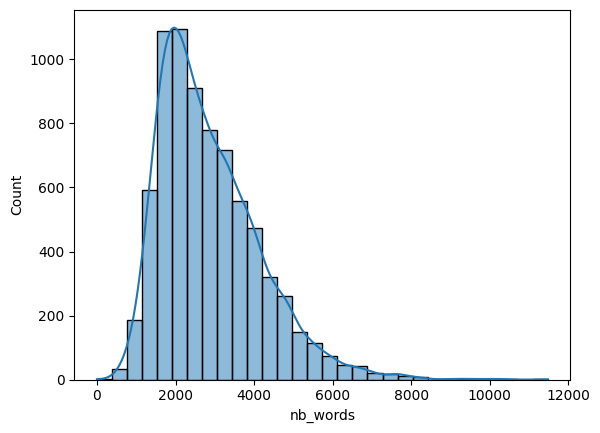

time: 283 ms (started: 2025-03-13 09:09:11 +01:00)


In [22]:
#plt.figure(figsize=(8, 2))
sns.histplot(df['nb_words'], bins=30, kde=True)


# Seaborn docs?
https://seaborn.pydata.org/index.html  
https://seaborn.pydata.org/generated/seaborn.distplot.html

## from where?

catplot shows the relationship between a numerical and one or more categorical variables.
https://seaborn.pydata.org/generated/seaborn.catplot.html

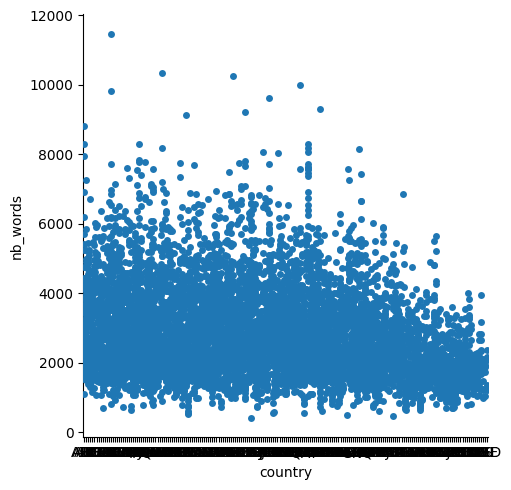

time: 4.27 s (started: 2025-03-13 09:09:12 +01:00)


In [23]:
sns.catplot(data=df, x="country", y="nb_words")

In [24]:
# how to build a selection:
df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])

0       False
1       False
2       False
3       False
4       False
        ...  
7503    False
7504    False
7505    False
7506    False
7507    False
Name: country, Length: 7508, dtype: bool

time: 5.72 ms (started: 2025-03-13 09:09:16 +01:00)


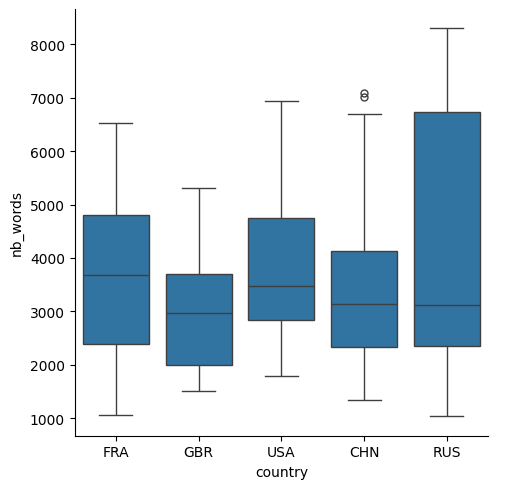

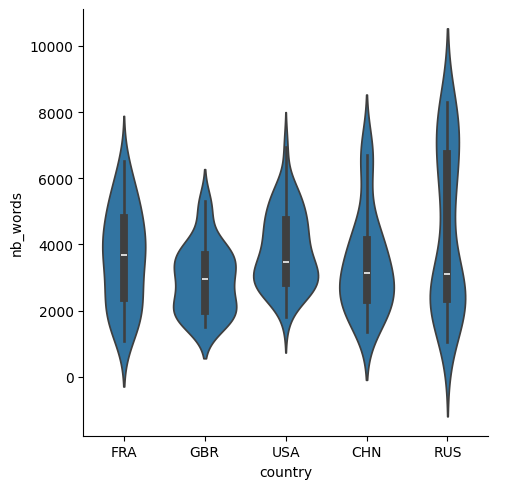

time: 547 ms (started: 2025-03-13 09:09:16 +01:00)


In [25]:
# using the selection
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x="country", y="nb_words", kind='box')
sns.catplot(data=df[where], x="country", y="nb_words", kind='violin')

## significant differences?

Student test? Anova ?

if the boxes (marking the quartiles) don't overlap each other and the sample size is at least 10, then the two groups being compared should have different medians at the 5% level: https://stats.stackexchange.com/questions/262495/reading-box-and-whisker-plots-possible-to-glean-significant-differences-between

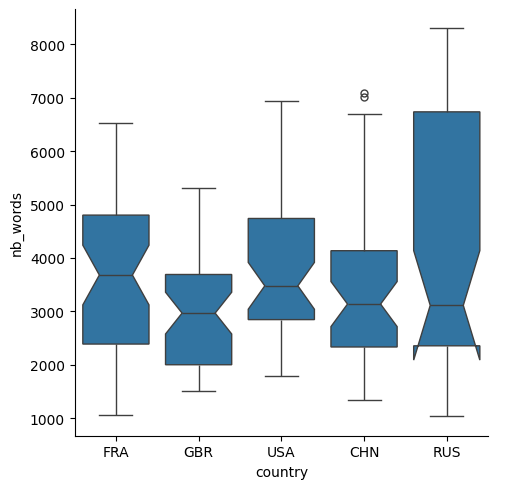

time: 239 ms (started: 2025-03-13 09:09:17 +01:00)


In [26]:
sns.catplot(data=df[where], x="country", y="nb_words", kind='box', notch= True)

## time?

size() returns the number of rows per group  
Why number of countries?

<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

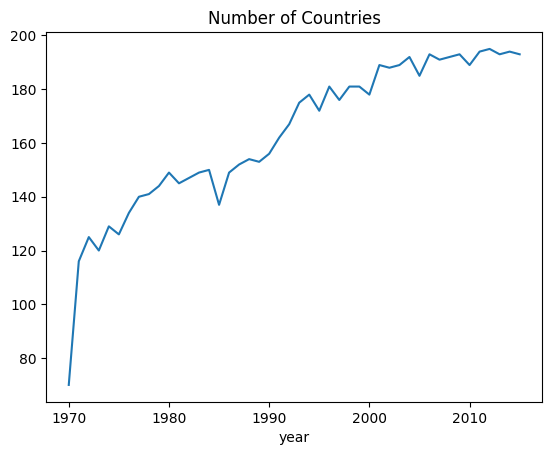

time: 163 ms (started: 2025-03-13 09:09:17 +01:00)


In [27]:
df.groupby('year').size().plot(title="Number of Countries")

when more people want to speak, ...?

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

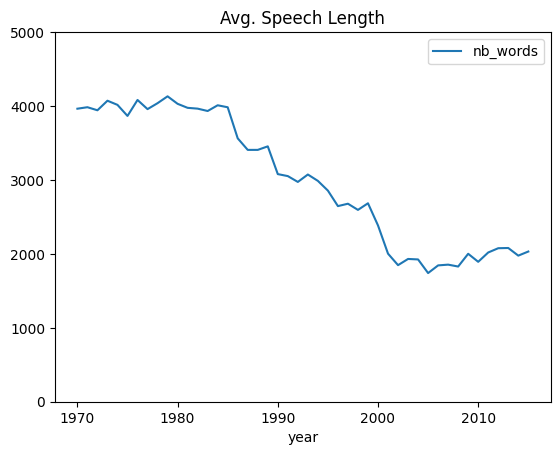

time: 162 ms (started: 2025-03-13 09:09:17 +01:00)


In [28]:
df.groupby('year').agg({'nb_words': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,5000))

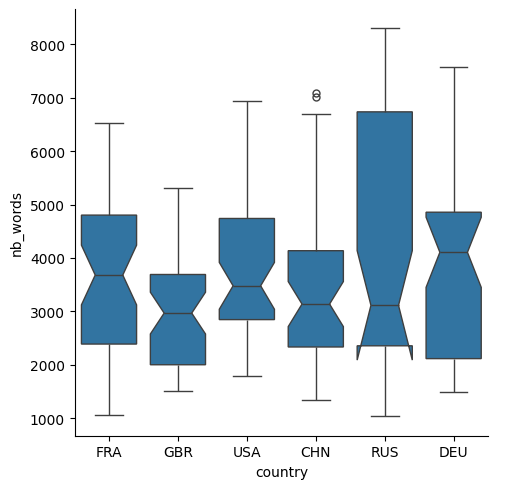

time: 257 ms (started: 2025-03-13 09:09:17 +01:00)


In [29]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS', 'FRG', 'DEU'])
sns.catplot(data=df[where], x="country", y="nb_words", kind='box', notch= True)

## 🚧 todo: When speaking English, do Germans use longer words?

- Compare to British natives, US natives, and French speakers. 
- Is the result significant?
- How do you explain this?

In [30]:
# 🚧 todo:
df['avg_wordsize'] = df['nb_chars'] / df['nb_words']

time: 2.57 ms (started: 2025-03-13 09:09:18 +01:00)


In [31]:
# 🚧 todo:
countries_of_interest = ['USA', 'FRA', 'GBR', 'CHN', 'RUS', 'FRG', 'DEU']
where = df['country'].isin(countries_of_interest)
df_subset = df[where]

time: 3.84 ms (started: 2025-03-13 09:09:19 +01:00)


#### 🚧 todo:
answer: 



In [32]:
df_subset.groupby('country')['avg_wordsize'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
CHN,45.0,6.439197,0.185708,5.971528,6.326048,6.426883,6.519050,6.980026
DEU,43.0,6.154939,0.140944,5.788027,6.096153,6.164179,6.244460,6.504673
FRA,46.0,6.055246,0.172108,5.745774,5.953585,6.073641,6.193547,6.377035
GBR,46.0,5.979929,0.131399,5.657432,5.903121,5.982479,6.038897,6.301391
RUS,45.0,6.253551,0.223910,5.981953,6.057796,6.218913,6.374532,6.764608
USA,46.0,6.051774,0.179343,5.718881,5.917761,6.050737,6.161272,6.467141


time: 39.4 ms (started: 2025-03-13 09:09:20 +01:00)


1. Germans do appear to use slightly longer words (in English) compared to British, American, and French speakers (in this dataset).

2. The difference is modest.

3. It may not necessarily reflect a purely “linguistic” trait but rather differences in translation practices, speech style, or context.

# Let's Zipf it!
## skim through this section if you have followed Hands-on NLP!
but execute the code so that we have the freq_df and start again at word clouds
### Let's first flatten the list

In [33]:
all_words = [word for speech in df['text'].dropna() for word in re.findall(r'\b\w+\b', speech.lower())]
len(all_words)

21746997

time: 7.69 s (started: 2025-03-13 09:09:22 +01:00)


In [34]:
text = "Wait... what?! What? WHAT?! You're telling me that 99.9% of statistics—including this one—are made up?! Made up, I say! Completely, absolutely, 100% made up!"
counter = Counter(re.findall(r'\b\w+\b', text.lower()))
counter

Counter({'what': 3,
         'made': 3,
         'up': 3,
         'wait': 1,
         'you': 1,
         're': 1,
         'telling': 1,
         'me': 1,
         'that': 1,
         '99': 1,
         '9': 1,
         'of': 1,
         'statistics': 1,
         'including': 1,
         'this': 1,
         'one': 1,
         'are': 1,
         'i': 1,
         'say': 1,
         'completely': 1,
         'absolutely': 1,
         '100': 1})

time: 4.34 ms (started: 2025-03-13 09:09:30 +01:00)


### What are the most common words of English?

In [35]:
counter = Counter(all_words)
counter.most_common(22)

[('the', 1899856),
 ('of', 1157672),
 ('and', 797094),
 ('to', 735169),
 ('in', 523852),
 ('a', 340669),
 ('that', 314683),
 ('is', 241832),
 ('for', 230472),
 ('we', 220360),
 ('on', 164270),
 ('this', 140718),
 ('our', 139917),
 ('be', 138408),
 ('it', 138368),
 ('as', 135677),
 ('with', 128166),
 ('by', 127714),
 ('nations', 124783),
 ('are', 121995),
 ('united', 120950),
 ('which', 118545)]

time: 2.52 s (started: 2025-03-13 09:09:30 +01:00)


for even bigger databases, it might be advisable to do the computation iteratively:

In [36]:
counter = Counter()
df['text'].dropna().apply(lambda text: counter.update(re.findall(r'\b\w+\b', text.lower())))
counter.most_common(22)

[('the', 1899856),
 ('of', 1157672),
 ('and', 797094),
 ('to', 735169),
 ('in', 523852),
 ('a', 340669),
 ('that', 314683),
 ('is', 241832),
 ('for', 230472),
 ('we', 220360),
 ('on', 164270),
 ('this', 140718),
 ('our', 139917),
 ('be', 138408),
 ('it', 138368),
 ('as', 135677),
 ('with', 128166),
 ('by', 127714),
 ('nations', 124783),
 ('are', 121995),
 ('united', 120950),
 ('which', 118545)]

time: 9.83 s (started: 2025-03-13 09:09:33 +01:00)


In [37]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df.sort_values('freq',  inplace=True, ascending=False)
freq_df

,freq
the,1899856
of,1157672
and,797094
to,735169
in,523852
...,...
shirks,1
hospitalized,1
calcified,1
dissemble,1


time: 29.7 ms (started: 2025-03-13 09:09:43 +01:00)


<Axes: >

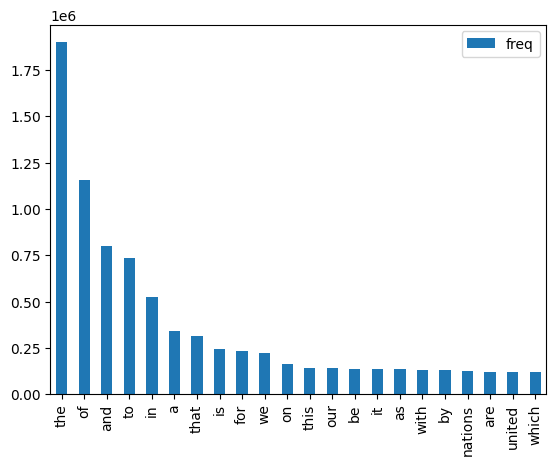

time: 462 ms (started: 2025-03-13 09:09:43 +01:00)


In [38]:
freq_df.head(22).plot(kind='bar')


<Axes: >

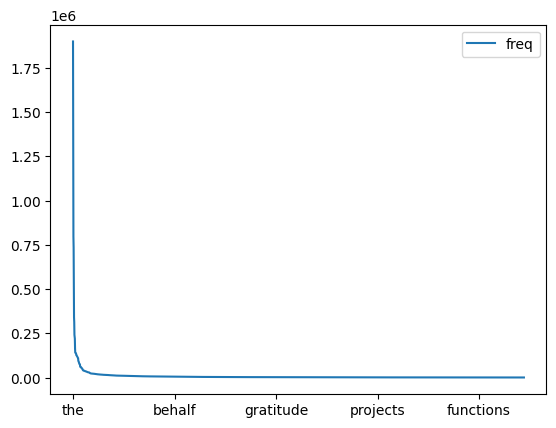

time: 500 ms (started: 2025-03-13 09:09:43 +01:00)


In [39]:
freq_df.head(2222).plot()

<Axes: >

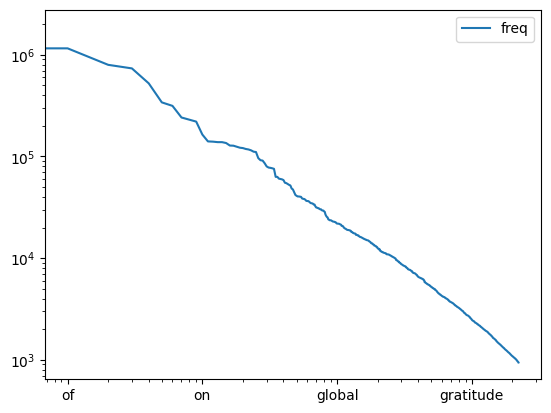

time: 577 ms (started: 2025-03-13 09:09:44 +01:00)


In [40]:
freq_df.head(2222).plot(loglog=True)

futher reading:  
https://en.wikipedia.org/wiki/Zipf's_law  
https://stats.stackexchange.com/questions/6780/how-to-calculate-zipfs-law-coefficient-from-a-set-of-top-frequencies

# Word cloud

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

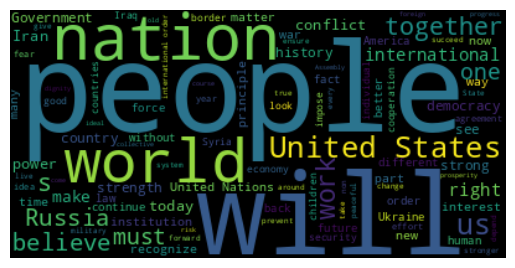

time: 329 ms (started: 2025-03-13 09:09:45 +01:00)


In [41]:
text = df.query("year==2015 and country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

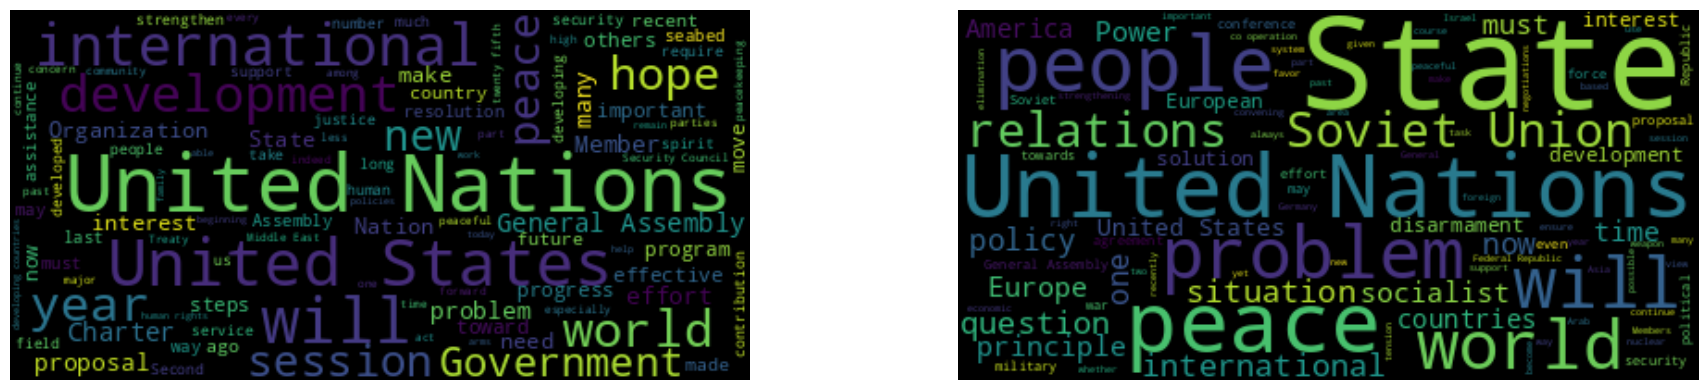

time: 623 ms (started: 2025-03-13 09:09:45 +01:00)


In [42]:
plt.subplots(1, 2, figsize=(20, 4))

text = df.query("country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)
plt.subplot(1, 2, 1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

text = df.query("country=='RUS'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)

plt.subplot(1, 2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

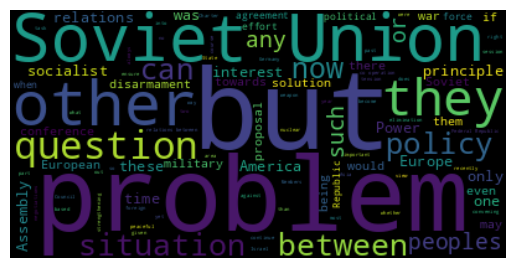

time: 295 ms (started: 2025-03-13 09:09:46 +01:00)


In [43]:
wc = WordCloud(max_words=100, stopwords=freq_df.head(50).index)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

the `generate_from_frequencies` function allows to generate without stopwords directly from a Counter:

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

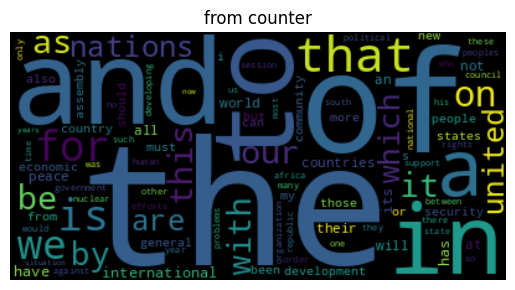

time: 342 ms (started: 2025-03-13 09:09:46 +01:00)


In [44]:
wc.generate_from_frequencies(counter)
plt.title('from counter')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Index

We want to build an inverted index:
- make a df such that for every type, we have a 1 if the document contains the type, 0 if not.
- for every type, give a list of document ids

# 🚧 todo:
- how many types do we have?
- how many documents do we have?

In [45]:
num_types = freq_df.shape[0]
print(num_types,'types')
num_docs = df['text'].dropna().shape[0]
print(num_docs,'documents')


54980 types
7507 documents
time: 4.03 ms (started: 2025-03-13 09:09:46 +01:00)


In [46]:
list(freq_df.index[66:77])

['they',
 'political',
 'rights',
 'one',
 'these',
 'africa',
 'there',
 'only',
 'so',
 'support',
 'such']

time: 4.45 ms (started: 2025-03-13 09:09:46 +01:00)


In [47]:
df[33:36]

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text,nb_chars,estimated_words,estimated_pages,estimated_minutes,nb_words,avg_wordsize
33,25.0,1970.0,KEN,Kenya,Mr. MUNGAI,unknown,"\n36.\t Mr. President, on behalf of His Excell...",21569.0,4313.8,7.189667,28.758667,3412,6.321512
34,25.0,1970.0,KHM,Cambodia,Mr. KOUN WICK,unknown,4.\t Before I begin this speech I should like ...,27661.0,5532.2,9.220333,36.881333,4523,6.115631
35,25.0,1970.0,KWT,Kuwait,Mr. ALJABER,unknown,"1.\t Mr. President, your election to the aug...",17114.0,3422.8,5.704667,22.818667,2782,6.151689


time: 24.3 ms (started: 2025-03-13 09:09:46 +01:00)


In [48]:
A = np.zeros((11, 3))
A.nbytes

264

time: 3.1 ms (started: 2025-03-13 09:09:46 +01:00)


we will first try the naïve way, to find out that this easily gets too slow:

In [49]:
for i,t in enumerate(freq_df.index[66:77]):
    for j, text in enumerate(df['text'][33:36]):
        # Tokenize text using regex
        tokens = set(re.findall(r'\b\w+\b', text.lower()))  # Use set for faster lookup
        if t in tokens:
            A[i, j] = 1  # Mark presence of token in text
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

time: 72.7 ms (started: 2025-03-13 09:09:47 +01:00)


In [50]:
A.nbytes

264

time: 4.12 ms (started: 2025-03-13 09:09:48 +01:00)


In [51]:
A = np.zeros((100, 7507)) # understand this: 100 most frequent words, 7507 speeches
for i,t in enumerate(freq_df.index[:100]):
    for j, text in enumerate(df['text'][33:100]): # play with the range to see how slow your machine is
        tokens = set(re.findall(r'\b\w+\b', text.lower())) 
        if t in tokens:
               A[i,j] =1
# can you do that loop more efficiently? This is not an obligatory task.
A

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(100, 7507))

time: 9.7 s (started: 2025-03-13 09:09:49 +01:00)


In [52]:
A.nbytes

6005600

time: 3.28 ms (started: 2025-03-13 09:10:00 +01:00)


### 🚧 todo:

What would be the size of the complete table?


In [53]:
# 🚧 todo:
T = freq_df.shape[0]  # number of unique tokens
D = df['text'].dropna().shape[0]  # number of documents
table_size = T * D
print(f"The presence matrix has {table_size} cells (size = {T} x {D})")

The presence matrix has 412734860 cells (size = 54980 x 7507)
time: 6.61 ms (started: 2025-03-13 09:10:01 +01:00)


### 🚧 todo:

How long will it take to fill the complete table?


In [54]:
# 🚧 todo:
# i take 9 seconds per 100, should be about linear

# for T = 50000, D = 7500, it will take around 33,750,000 seconds, or 9,375 hours, or 390 days

time: 418 μs (started: 2025-03-13 09:10:03 +01:00)


### redoing the same thing with CountVectorizer

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

df[33:36].text

33    \n36.\t Mr. President, on behalf of His Excell...
34    4.\t Before I begin this speech I should like ...
35    1.\t   Mr. President, your election to the aug...
Name: text, dtype: object

time: 115 ms (started: 2025-03-13 09:10:05 +01:00)


In [56]:
vectorizer = CountVectorizer(vocabulary=freq_df.index[66:77], binary=True, min_df=1, lowercase=False)
# understand the options: 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
X = vectorizer.fit_transform(df[33:36].text)
print(vectorizer.get_feature_names_out())
print(X.toarray())


['they' 'political' 'rights' 'one' 'these' 'africa' 'there' 'only' 'so'
 'support' 'such']
[[1 1 1 0 1 0 1 1 1 1 1]
 [1 1 0 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 0 1]]
time: 18.1 ms (started: 2025-03-13 09:10:05 +01:00)


In [57]:
# make it pretty:
d = {c:X.toarray()[i] for i,c in enumerate(df[33:36].index)}
df_cv = pd.DataFrame.from_dict(d,  orient='index',columns=freq_df.index[66:77])
df_cv

,they,political,rights,one,these,africa,there,only,so,support,such
33,1,1,1,0,1,0,1,1,1,1,1
34,1,1,0,1,1,0,1,1,1,1,1
35,1,1,1,1,1,0,1,1,1,0,1


time: 19.3 ms (started: 2025-03-13 09:10:06 +01:00)


## trying the complete set of documents with the complete vocabulary

In [58]:
vectorizer = CountVectorizer(vocabulary=freq_df.index, binary=True, min_df=1, lowercase=False)
X = vectorizer.fit_transform(df['text'].dropna())
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[:11])
print(X.toarray())

54980
['the' 'of' 'and' 'to' 'in' 'a' 'that' 'is' 'for' 'we' 'on']
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
time: 12.8 s (started: 2025-03-13 09:10:07 +01:00)


- wow! comparably fast!
#### 🚧 todo:
- can you get the vector of "the"? is there a speech that doesn't use it?


In [59]:
col_idx_the = vectorizer.vocabulary_.get("the")
the_col = X[:, col_idx_the]  
the_col_array = the_col.toarray().ravel()
the_col_array

array([1, 1, 1, ..., 1, 1, 1], shape=(7507,))

time: 9.76 ms (started: 2025-03-13 09:10:20 +01:00)


answer: 

In [60]:
docs_without_the = np.where(the_col_array == 0)[0]
print("Documents that do NOT contain 'the':", docs_without_the)

Documents that do NOT contain 'the': []
time: 1.31 ms (started: 2025-03-13 09:10:24 +01:00)


#### 🚧 todo: some visualizations of the vectorization

- make 2D scatterplots of the vectorization using PCA and t-SNE.
- use the years as hue
- explain why this looks so different
- hard: choose a cluster that looks mainly stemming from earlier texts, another stemming from recent texts, and find a few examples of terms that makes them different.

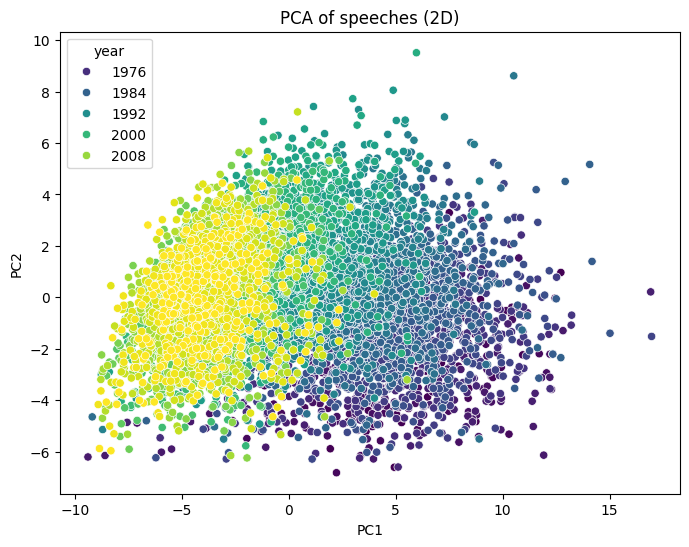

time: 19.7 s (started: 2025-03-13 09:10:25 +01:00)


In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2, random_state=42)

df_sub = df.dropna(subset=["text"])  
X = vectorizer.fit_transform(df_sub['text'])
X_pca = pca.fit_transform(X.toarray())

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_sub.index)
pca_df["year"] = df_sub["year"].values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df, 
    x="PC1", 
    y="PC2", 
    hue="year", 
    palette="viridis",
)
plt.title("PCA of speeches (2D)")
plt.show()

/home/petko/uni/ai-master/m1/t_4/information_retrieval/assignments/env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


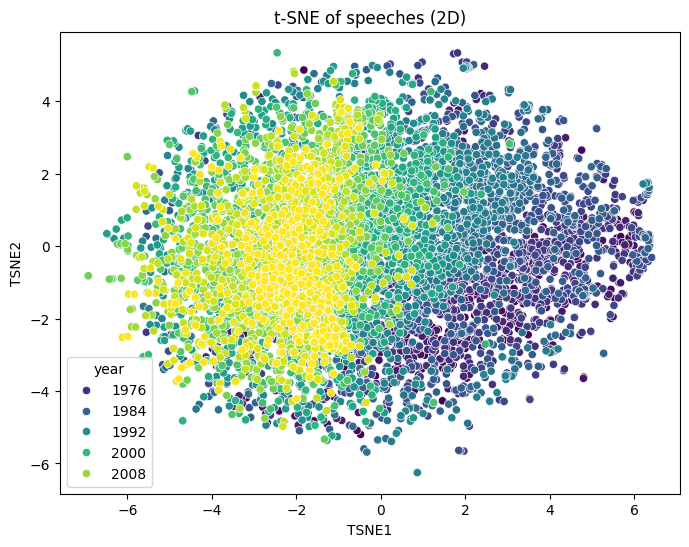

time: 1min 8s (started: 2025-03-13 09:10:45 +01:00)


In [62]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X.toarray())

tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"], index=df_sub.index)
tsne_df["year"] = df_sub["year"].values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df, 
    x="TSNE1", 
    y="TSNE2", 
    hue="year",
    palette="viridis",
)
plt.title("t-SNE of speeches (2D)")
plt.show()

# analyze two clusters of the PCA plot: top right and bottom left:

In [63]:
# Define clusters based on PCA components
cluster_1 = pca_df[pca_df["PC1"] > 0.8].index
cluster_2 = pca_df[(pca_df["PC1"] < -0.2) & (pca_df["PC2"] > 0.8)].index

X_cluster_1 = X[cluster_1]
X_cluster_2 = X[cluster_2]

count_cluster_1 = np.asarray(X_cluster_1.sum(axis=0)).ravel()
count_cluster_2 = np.asarray(X_cluster_2.sum(axis=0)).ravel()

freq_cluster_1 = count_cluster_1 / X_cluster_1.shape[0]
freq_cluster_2 = count_cluster_2 / X_cluster_2.shape[0]

diff = freq_cluster_2 - freq_cluster_1

vocab = vectorizer.get_feature_names_out()
diff_df = pd.DataFrame({
    "Cluster 1 (PC1 > 0.8)": freq_cluster_1,
    "Cluster 2 (PC1 < -0.2, PC2 > 0.8)": freq_cluster_2,
    "Difference (2 - 1)": diff
}, index=vocab)

diff_df.sort_values("Difference (2 - 1)", ascending=False, inplace=True)
diff_df.head(10)

,Cluster 1 (PC1 > 0.8),"Cluster 2 (PC1 < -0.2, PC2 > 0.8)",Difference (2 - 1)
sustainable,0.117974,0.739189,0.621215
challenges,0.353922,0.864189,0.510268
reform,0.298039,0.765541,0.467501
cooperation,0.438562,0.903378,0.464816
governance,0.044444,0.450676,0.406231
peacekeeping,0.069935,0.431081,0.361146
sixty,0.009804,0.340541,0.330737
2015,0.005882,0.326351,0.320469
partnership,0.110131,0.408108,0.297977
globalization,0.054248,0.346622,0.292373


time: 69.8 ms (started: 2025-03-13 09:12:09 +01:00)


# another big vocabulary:
- we could grab a pageview file here https://dumps.wikimedia.org/other/pageviews/2022/2022-01/ and  produce a list of potential terms from it
- it's easier to use wikidata, and we concentrate on people:

here is code that grabs it and produces a file of person names. this API is unstable, so i propose to download directly the result on my website, see code below.

In [ ]:
# you can skip this cell if you are only interested in the result, see next cell

def fetch_wikidata_humans(limit=10000, offset=0):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    query = f"""
    SELECT ?human ?humanLabel WHERE {{
      ?human wdt:P31 wd:Q5.  # Humans (Q5)
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
    }}
    LIMIT {limit}
    OFFSET {offset}
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return results

# Fetch the first batch
humans_data = []
offset = 0
batch_size = 5000  # Fetch this batch size at a time

while True:
    print(f"Fetching humans from offset {offset}")
    results = fetch_wikidata_humans(limit=batch_size, offset=offset)
    if "results" in results and "bindings" in results["results"]:
        batch = results["results"]["bindings"]
        if not batch:
            break  # Stop if no more results

        for result in batch:
            humans_data.append({
                "Wikidata ID": result["human"]["value"].split("/")[-1],
                "Name": result["humanLabel"]["value"]
            })
        offset += batch_size  # Move to the next batch
    else:
        break  # Stop if no valid response

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(humans_data)

# write the Name column to a file
df['Name'].to_csv('wikidata_names.txt', index=False)

In [65]:
file_name = 'wikidata_names.txt'
zip_file = file_name + '.zip'
url = 'https://gerdes.fr/saclay/inforet/' + zip_file

if os.path.exists(file_name):
    print('File already present')
else:
    print('Downloading the file...')
    os.system(f'curl -o {zip_file} {url}')
    os.system(f'unzip {zip_file}')

File already present
time: 1.5 ms (started: 2025-03-13 09:12:39 +01:00)


In [66]:
# read the file back into a simple list, one item per line
with open('wikidata_names.txt') as f:
	names = set(f.read().splitlines())
names

{'Eric Barba',
 'Daniel González Güiza',
 'Ivan Bunin',
 'Raffaëla Paton',
 'Clemens Brentano',
 'Bimal Roy',
 'Elaine Weyuker',
 'Naftali Bennett',
 'Lyubov Sadchikova',
 'Muhammad Ali',
 'Bidzina Ivanishvili',
 'Aksana',
 'Israel Isserlein',
 'Dimitrij Ovtcharov',
 'Stéphane Audran',
 'Kyle Schmid',
 'Sigismund von Lamberg',
 'Hakim Toumi',
 'Karl Jónsson',
 'Axel Fischer',
 'Flavio Sciolè',
 'Hifikepunye Pohamba',
 'Antonella Mularoni',
 'Joyce Banda',
 'Charlie Chaplin',
 'Javier Álamo Cruz',
 'Alexander Cartwright',
 'John M. Clayton',
 'Massimo Troisi',
 'Gladwyn Jebb',
 'Rupert Mayer',
 'Henri Kontinen',
 'Benedictus de Spinoza',
 'Étienne Léopold Trouvelot',
 'Tekle Giyorgis II',
 'Abel Mutai',
 'Carl van Dockum',
 'Raymond Schwartz',
 'Marreese Speights',
 'Larisa Latynina',
 'Emily Dickinson',
 'Andre Wisdom',
 'Al-Ghazali',
 'Ulrika Toft Hansen',
 'Bob Mathias',
 'Marcelino Olaechea',
 'Lila Kari',
 'Carlo Lizzani',
 'Lyudmila Zhuravlyova',
 'Kim Ji-han',
 'Ludwig II of Bava

time: 26.9 ms (started: 2025-03-13 09:12:40 +01:00)


In [67]:
vectorizer = CountVectorizer(vocabulary=names, binary=True, min_df=1, lowercase=False, ngram_range=(1,4))
X = vectorizer.fit_transform(df.text.dropna())
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[:11])
X

9986
['"""Weird Al"" Yankovic"' '"Adalbert I, Duke of Teck"'
 '"Adolphe, Grand Duke of Luxembourg"' '"Albert II, Prince of Monaco"'
 '"Albert, Duke in Prussia"' '"Alexandre, Chevalier de Chaumont"'
 '"Andrew Cunningham, 1st Viscount Cunningham of Hyndhope"'
 '"Anna de\' Medici, Archduchess of Austria"'
 '"Archduchess Margaretha, Archduchess Karl Ludwig of Austria"'
 '"Armand-Jean du Plessis, duc de Richelieu"'
 '"Arnulf II, count of Flanders"']


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5912 stored elements and shape (7507, 9986)>

time: 44.9 s (started: 2025-03-13 09:12:41 +01:00)


#### 🚧 todo: 
- find the most frequently cited names
- analyze who cites
- analyze the length of the cited names in tokens


In [68]:
name_list = vectorizer.get_feature_names_out()
counts = np.asarray(X.sum(axis=0)).ravel()

name_counts = pd.DataFrame({"name": name_list, "doc_count": counts})
name_counts.sort_values("doc_count", ascending=False, inplace=True)

top_names = name_counts.head(20)
top_names

,name,doc_count
5596,Kofi Annan,1085
5669,Kurt Waldheim,525
7044,Nelson Mandela,434
7713,Prince,263
1790,Christian,218
5236,Julian,156
4626,Jean Ping,134
8348,Sam Kutesa,111
164,Abdelaziz Bouteflika,100
4982,John Paul II,98


time: 21.4 ms (started: 2025-03-13 09:22:22 +01:00)


In [69]:
df_sub = df.dropna(subset=["text"])
X_df = pd.DataFrame(X.toarray(), index=df_sub.index, columns=name_list)
X_merged = pd.concat([df_sub["country"], X_df], axis=1)
country_mentions = X_merged.groupby("country").sum()
country_mentions["Nelson Mandela"].sort_values(ascending=False).head(10)

country
IRL    9
KEN    8
BEN    7
GRD    7
IND    7
PRT    7
MUS    7
UGA    7
USA    6
BDI    6
Name: Nelson Mandela, dtype: int64

time: 871 ms (started: 2025-03-13 09:23:47 +01:00)


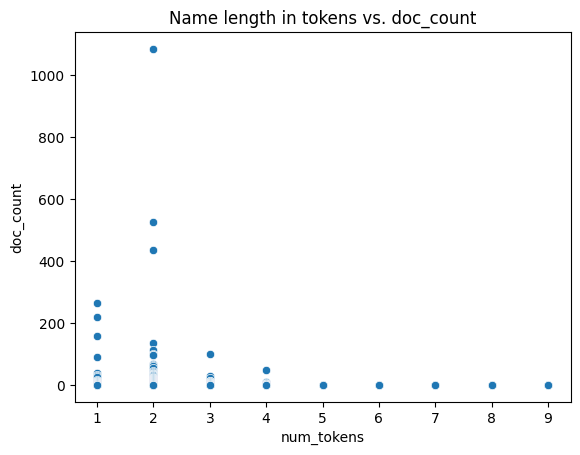

time: 187 ms (started: 2025-03-13 09:24:56 +01:00)


In [70]:
def count_tokens_in_name(name):
    return len(name.split())

name_counts["num_tokens"] = name_counts["name"].apply(count_tokens_in_name)

name_counts.sort_values("num_tokens", ascending=False).head(10)

sns.scatterplot(
    data=name_counts, 
    x="num_tokens", 
    y="doc_count"
)
plt.title("Name length in tokens vs. doc_count")
plt.show()

- check this: https://en.wikipedia.org/wiki/Kofi_Annan

# Homework

complete the # 🚧 todo:

and
## find the most frequently encountered person entity
- in number of speeches
- in number of occurrences




In [72]:
vectorizer = CountVectorizer(
    vocabulary=names,
    lowercase=False,
    ngram_range=(1,4),
    binary=False
)

df_sub = df.dropna(subset=["text"])
X = vectorizer.fit_transform(df_sub["text"])

vocab = vectorizer.get_feature_names_out()

counts_by_doc = (X > 0).sum(axis=0).A1

counts_total = X.sum(axis=0).A1

df_person = pd.DataFrame({
    "name": vocab,
    "doc_count": counts_by_doc,
    "occurrences": counts_total
})

top_by_docs = df_person.sort_values("doc_count", ascending=False).head(10)

top_by_occurrences = df_person.sort_values("occurrences", ascending=False).head(10)

print("Top 10 by # of speeches:")
print(top_by_docs)

print("\nTop 10 by total occurrences:")
print(top_by_occurrences)


Top 10 by # of speeches:
                      name  doc_count  occurrences
5596            Kofi Annan       1085         1260
5669         Kurt Waldheim        525          560
7044        Nelson Mandela        434          475
7713                Prince        263          399
1790             Christian        218          263
5236                Julian        156          163
4626             Jean Ping        134          136
8348            Sam Kutesa        111          112
164   Abdelaziz Bouteflika        100          106
4982          John Paul II         98          111

Top 10 by total occurrences:
                name  doc_count  occurrences
5596      Kofi Annan       1085         1260
5669   Kurt Waldheim        525          560
7044  Nelson Mandela        434          475
7713          Prince        263          399
1790       Christian        218          263
7691         Pol Pot         96          206
5236          Julian        156          163
8318  Saddam Hussein    

### Before submitting, check:
- I have not imported any other modules
- I have put explanations between the lines of code (either inline or in separate cells)
- My notebook runs all the way through when I hit
  1. the ↻ button and then
  2. the ⏩︎ button (remove or comment out cells that are too slow and not needed).
  